In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Loading the dataset

In [10]:
df = pd.read_csv('/content/housing.csv')

Exploration of the dataset

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
df.shape

(20433, 16)

In [11]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Data Preprocessing

In [12]:
df.dropna(inplace=True)

In [5]:
df.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [16]:
pd.get_dummies(df.ocean_proximity).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [18]:
df= df.join(pd.get_dummies(df.ocean_proximity).astype(int)).drop('ocean_proximity', axis=1)


In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


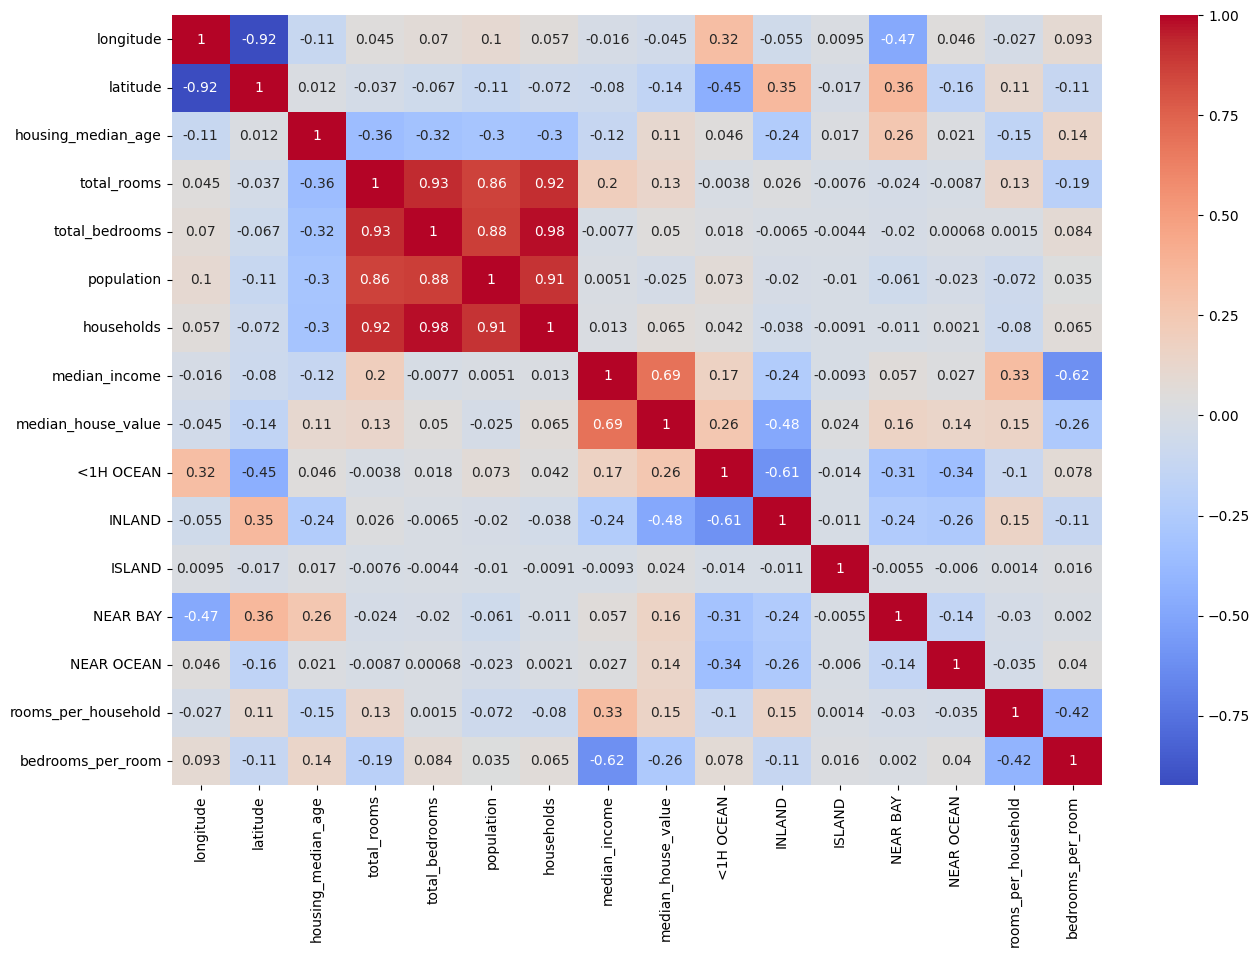

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Feature Engineering

In [23]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

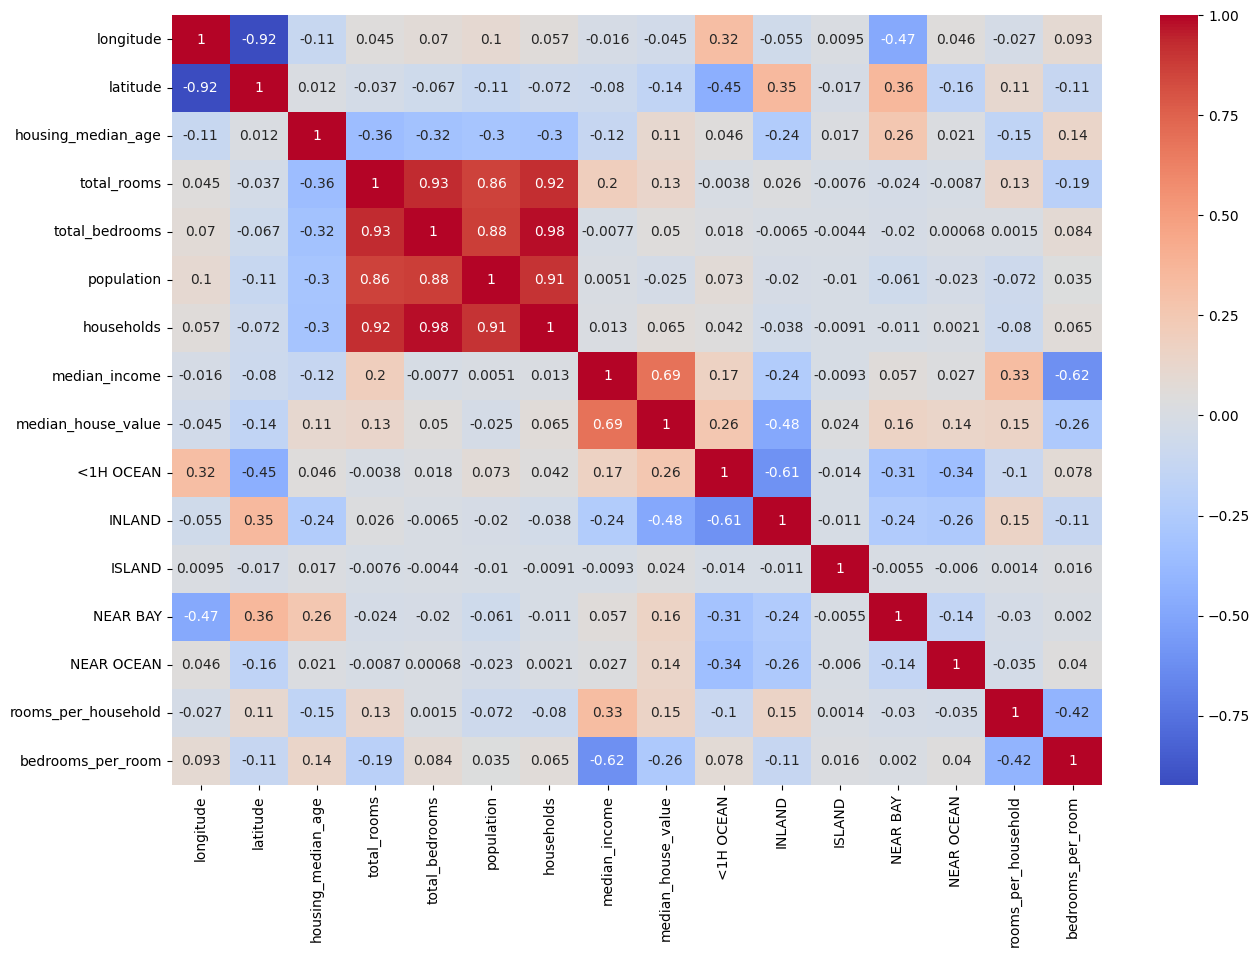

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [28]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,5.431344,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,2.482946,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.846154,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.441441,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.230769,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.052381,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,141.909091,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20433 non-null  float64
 1   latitude             20433 non-null  float64
 2   housing_median_age   20433 non-null  float64
 3   total_rooms          20433 non-null  float64
 4   total_bedrooms       20433 non-null  float64
 5   population           20433 non-null  float64
 6   households           20433 non-null  float64
 7   median_income        20433 non-null  float64
 8   median_house_value   20433 non-null  float64
 9   <1H OCEAN            20433 non-null  int64  
 10  INLAND               20433 non-null  int64  
 11  ISLAND               20433 non-null  int64  
 12  NEAR BAY             20433 non-null  int64  
 13  NEAR OCEAN           20433 non-null  int64  
 14  rooms_per_household  20433 non-null  float64
 15  bedrooms_per_room    20433 non-null  floa

In [30]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
<1H OCEAN,0


In [31]:
df.duplicated().sum()

np.int64(0)

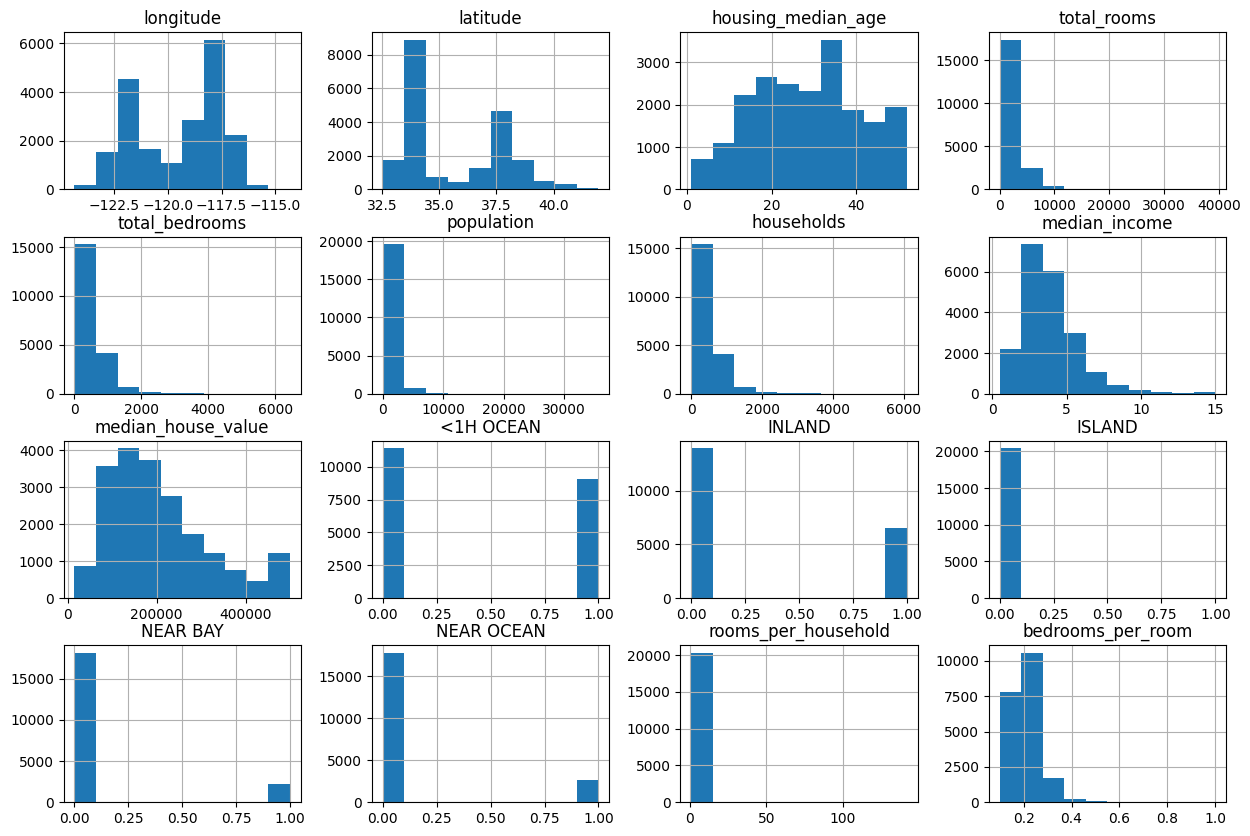

In [32]:
df.hist(figsize=(15,10))
plt.show()

Split into training and test set

In [33]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

Simple Linear Regression

In [38]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [40]:
Linear_Model_pred = linear_reg.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation metrics
mse = mean_squared_error(y_test, Linear_Model_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Linear_Model_pred)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Linear Regression Results:
Mean Squared Error: 4767408283.392106
Root Mean Squared Error: 69046.42122074182
R-squared: 0.6513824308446601


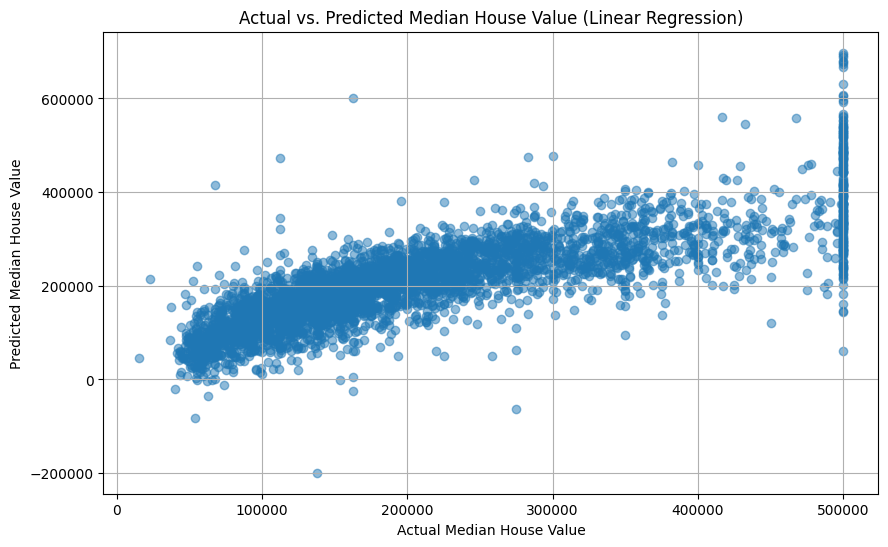

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Linear_Model_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value (Linear Regression)")
plt.grid(True)
plt.show()

XG Boost Model

In [52]:
column_names = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
cleaned_column_names = [col.replace('<', '').replace('[', '').replace(']', '') for col in column_names]
print(cleaned_column_names)

['1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


In [71]:
from xgboost import XGBRegressor, plot_importance


xgb_model = XGBRegressor(
    n_estimators=700,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [72]:
# Make predictions with the best XGBoost model
best_xgb_pred = xgb_model.predict(X_test)

# Evaluate the best XGBoost model
mse_xgb = mean_squared_error(y_test, best_xgb_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, best_xgb_pred)

print("XGBoost Regression Results (with best estimators):")
print("Mean Squared Error:", mse_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R-squared:", r2_xgb)

XGBoost Regression Results (with best estimators):
Mean Squared Error: 2323810589.9319696
Root Mean Squared Error: 48205.91861931447
R-squared: 0.8300709419284094


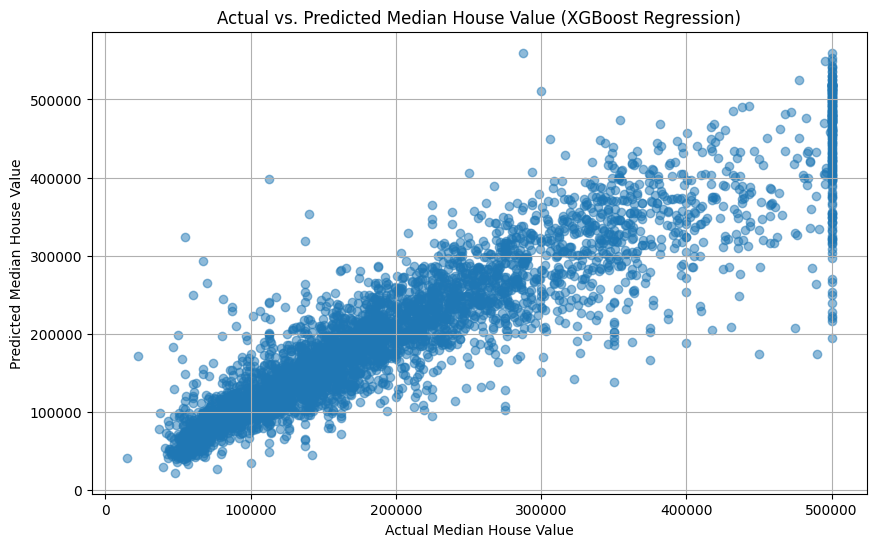

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_xgb_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value (XGBoost Regression)")
plt.grid(True)
plt.show()